# Exploratory data analysis (EDA)

Dig in your data, find stuff

In [8]:
# Notebook config, enviroment and logging

import os
import sys

import logging
from dotenv import load_dotenv

import pakkenellik.config as conf
from pakkenellik.log import logger

# Add module path and load config
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Autoreload extension
if "autoreload" not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Load the .env file into local env
load_dotenv()

# Create the config
config = conf.Config(module_path)

# Enable logging and crank up log level to INFO.
# DEBUG gives lots of output when working with matplot
logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
## Viz and analysis

# important for showing graphs
%matplotlib inline

import math
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Get data

In [10]:
df = pd.read_csv(config.get_processed_file("etl_vestland.csv"))
df.municipality_id = df.municipality_id.astype(str)

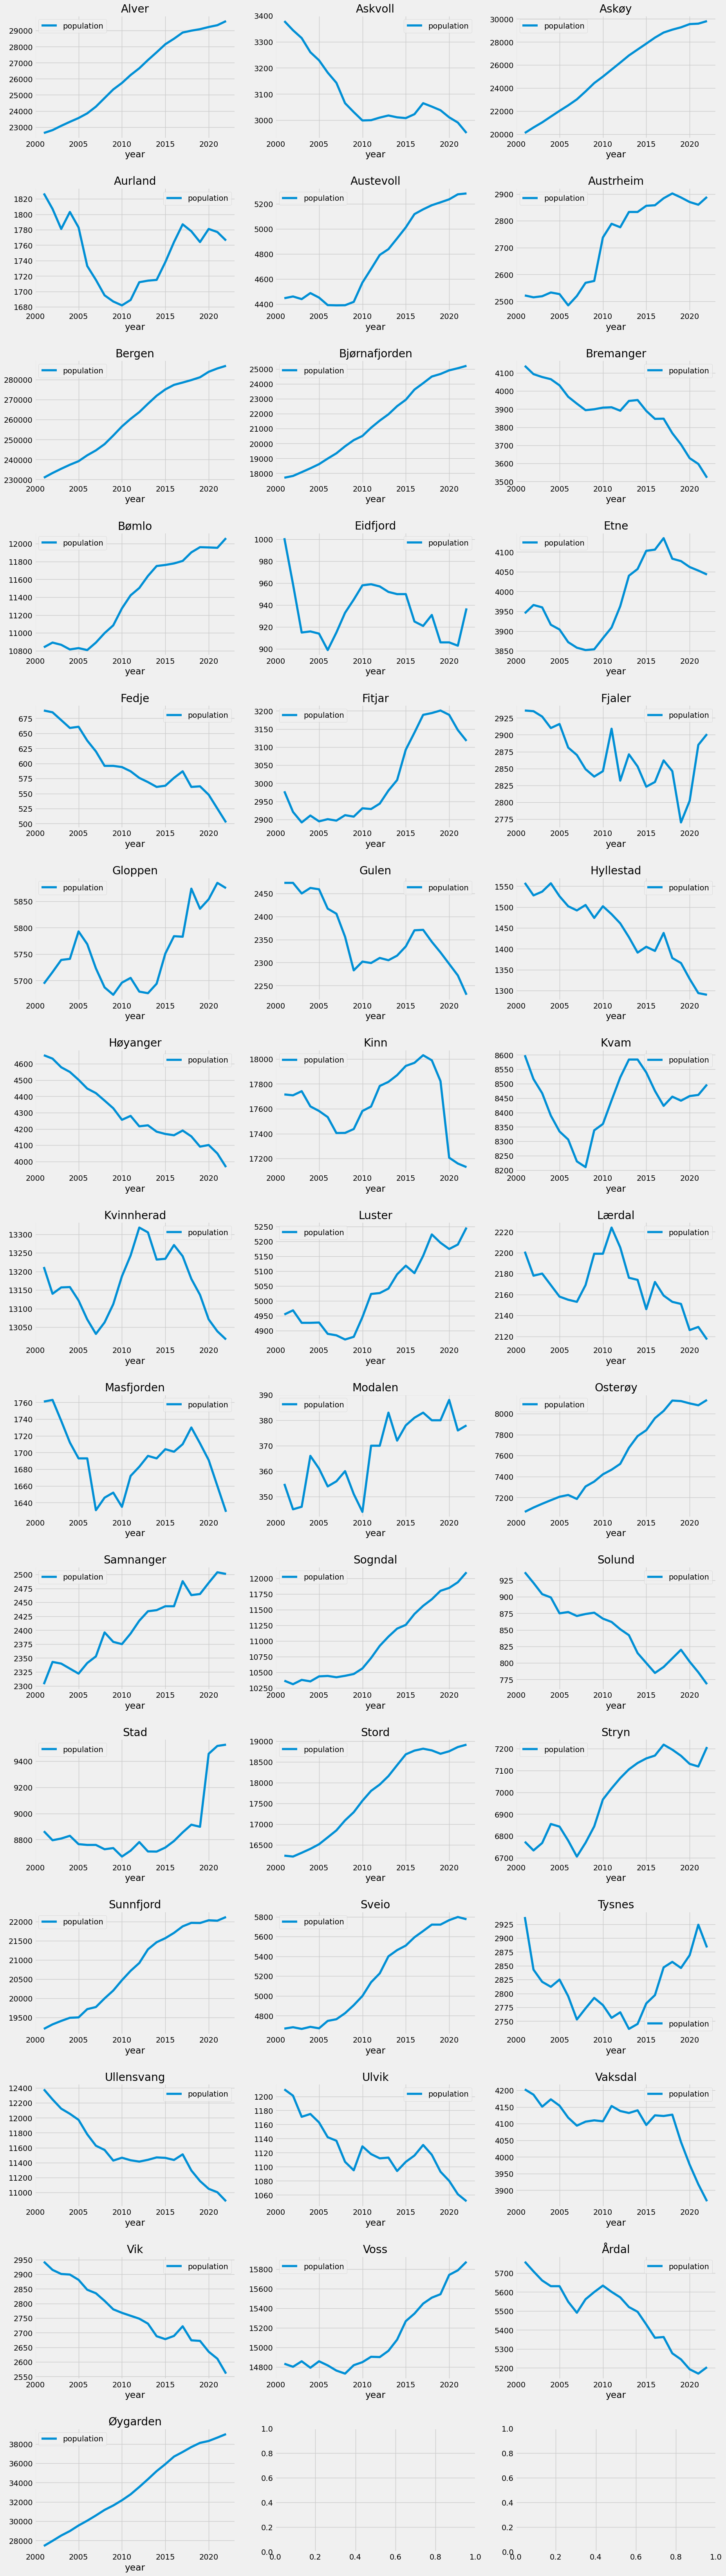

In [16]:
number_of_graphs_each_line = 3
number_of_lines = math.ceil(len(df["municipality_id"].unique()) / 3)

df = df.sort_values(by=["municipality", "year"])

with plt.style.context("fivethirtyeight"):
    fig, axes = plt.subplots(
        number_of_lines, number_of_graphs_each_line, figsize=(20, 80)
    )
    plt.subplots_adjust(hspace=0.4)

    for i, municipality in enumerate(df["municipality_id"].unique()):
        df_data = df[df.municipality_id == municipality]

        ax = axes[
            math.floor(i / number_of_graphs_each_line), i % number_of_graphs_each_line
        ]
        ax.set_title("{kommune}".format(kommune=df_data["municipality"].iloc[0]))
        df_data.plot(ax=ax, x="year", y="population")